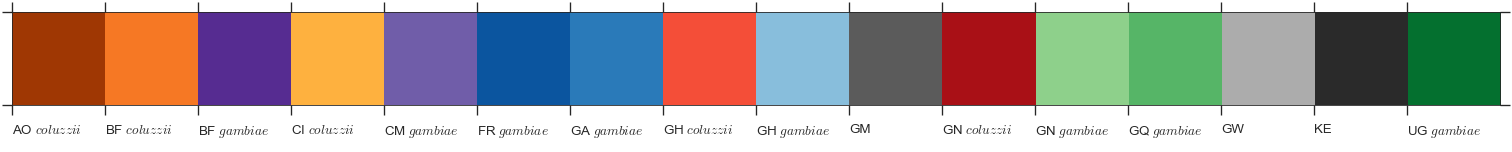

In [1]:
%run data_phase2_ar1.ipynb
# ag1k imports
sys.path.insert(0, '/home/csclarkson/src/python')
from ag1k.util import *
from ag1k import phase2_ar1
from ag1k import phase1_ar3
from ag1k import phase1_ar31

# RDL

In [190]:
chrom = '2L'

In [191]:
g = phase2_ar1.callset_pass
g

Group(/, 6)
  arrays: 1; samples
  groups: 5; 2L, 2R, 3L, 3R, X
  store: DirectoryStore

In [192]:
samples = g['samples'][:]
len(samples), samples[0].decode()

(1142, 'AA0040-C')

In [193]:
pos = allel.SortedIndex(g['2L/variants/POS'][:])
len(pos), pos[0]

(11524923, 25050)

In [77]:
ref = g['2L/variants/REF'][:]
alt = g['2L/variants/ALT'][:]

alt = alt[:,0]
len(ref)

11524923

In [73]:
boo = np.in1d(pos, np.asarray([25429235,25429236]))
len(boo), np.count_nonzero(boo)

(11524923, 2)

In [128]:
gr = allel.GenotypeChunkedArray(g['2L/calldata/genotype'])
grr = gr.compress(boo)
ref = ref.compress(boo)
alt = alt.compress(boo)
grr

,0,1,2,3,4,...,1137,1138,1139,1140,1141
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,1/1,1/1,0/1,...,0/1,0/0,0/0,0/1,1/1


In [82]:
#alleles
ref, alt

(array([b'G', b'C'], 
       dtype='|S1'), array([b'T', b'G'], 
       dtype='|S1'))

In [254]:
r_gen = []
for i, q in zip(grr[0, :], grr[1, :]):
    if (str(i) == '[0 0]') & (str(q) == '[0 0]'):
        r_gen.append('+/+')
    elif (str(i) == '[0 1]') & (str(q) == '[0 0]'):
        r_gen.append('+/S')
    elif (str(i) == '[1 1]') & (str(q) == '[0 0]'):
        r_gen.append('S/S')
    elif (str(i) == '[0 0]') & (str(q) == '[0 1]'):
        r_gen.append('+/G')
    elif (str(i) == '[0 0]') & (str(q) == '[1 1]'):
        r_gen.append('G/G')
    elif (str(i) == '[0 1]') & (str(q) == '[0 1]'):
        r_gen.append('G/S')
    else:
        r_gen.append('whut')

In [255]:
len(r_gen)

1142

In [97]:
samples_nob = [i.decode() for i in samples]

In [256]:
tbl_rdl = etl.empty().addcolumn('ox_code', samples_nob).addcolumn('rdl_296', r_gen)
tbl_rdl

0|ox_code,1|rdl_296
AA0040-C,+/+
AA0041-C,+/+
AA0042-C,G/G
AA0043-C,G/G
AA0044-C,+/G


In [257]:
tbl_rdl.valuecounts('rdl_296').displayall()

0|rdl_296,1|count,2|frequency
+/+,586,0.5131348511383538
+/G,310,0.2714535901926445
G/G,179,0.15674255691768826
+/S,39,0.03415061295971979
S/S,27,0.023642732049036778
G/S,1,0.0008756567425569177


In [259]:
etl.totsv(tbl_rdl, '/kwiat/vector/ag1000g/release/phase2.AR1/samples/samples.rdl.txt')

# kdr

In [194]:
book = np.in1d(pos, np.asarray([2422651, 2422652]))
len(book), np.count_nonzero(book)

(11524923, 2)

In [195]:
ref = g['2L/variants/REF'][:]
alt = g['2L/variants/ALT'][:]
alt = alt[:,0]
len(ref)

11524923

In [196]:
gr = allel.GenotypeChunkedArray(g['2L/calldata/genotype'])
grrk = gr.compress(book)
refk = ref.compress(book)
altk = alt.compress(book)
grrk

,0,1,2,3,4,...,1137,1138,1139,1140,1141
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,1/1,1/1,1/1,0/1,0/1,...,1/1,1/1,1/1,1/1,0/1


In [197]:
refk, altk

(array([b'T', b'A'], 
       dtype='|S1'), array([b'C', b'T'], 
       dtype='|S1'))

In [205]:
tbl_kdr = etl.empty().addcolumn('ox_code', samples_nob).addcolumn('vgsc_995', aakl)
tbl_kdr.displayall()

0|ox_code,1|vgsc_995
AA0040-C,F/F
AA0041-C,F/F
AA0042-C,F/F
AA0043-C,+/F
AA0044-C,+/F
AA0048-C,F/F
AA0049-C,+/F
AA0050-C,F/F
AA0051-C,F/F
AA0052-C,+/F


In [206]:
tbl_kdr.valuecounts('vgsc_995').displayall()

0|vgsc_995,1|count,2|frequency
F/F,444,0.38879159369527144
+/+,238,0.2084063047285464
S/S,175,0.1532399299474606
+/F,152,0.1330998248686515
 /+,91,0.0796847635726795
+/S,42,0.03677758318739054


In [246]:
k_gen = []
for i, q in zip(grrk[0, :], grrk[1, :]):
    if (str(i) == '[0 0]') & (str(q) == '[0 0]'):
        k_gen.append('+/+')
    elif (str(i) == '[0 1]') & (str(q) == '[0 0]'):
        k_gen.append('+/S')
    elif (str(i) == '[1 1]') & (str(q) == '[0 0]'):
        k_gen.append('S/S')
    elif (str(i) == '[0 0]') & (str(q) == '[0 1]'):
        k_gen.append('+/F')
    elif (str(i) == '[0 0]') & (str(q) == '[1 1]'):
        k_gen.append('F/F')
    elif (str(i) == '[0 1]') & (str(q) == '[0 1]'):
        k_gen.append('F/S')
    else:
        k_gen.append('whut')

In [251]:
tbl_kdr = etl.empty().addcolumn('ox_code', samples_nob).addcolumn('vgsc_995', k_gen)
tbl_kdr

0|ox_code,1|vgsc_995
AA0040-C,F/F
AA0041-C,F/F
AA0042-C,F/F
AA0043-C,+/F
AA0044-C,+/F


In [252]:
tbl_kdr.valuecounts('vgsc_995').displayall()

0|vgsc_995,1|count,2|frequency
F/F,444,0.38879159369527144
+/+,238,0.2084063047285464
S/S,175,0.1532399299474606
+/F,152,0.1330998248686515
F/S,91,0.0796847635726795
+/S,42,0.03677758318739054


In [253]:
etl.totsv(tbl_kdr, '/kwiat/vector/ag1000g/release/phase2.AR1/samples/samples.kdr.txt')

In [ ]:
#these F/S look suspicious unless they are CM-
# --- they are CM